<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/air_parametrs_uzbek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_air_parametres.csv")
df.head()

,Sana,Vaqt,Stansiya,Namlik,Harorat,Yog'ingarchilik,PM2.5,latitude,longitude
0,3/18/2024,13:00,Xalqlar do'stligi,31.600,21.500,0.0,16.0,41.310900,69.240700
1,3/18/2024,13:00,Lokomotiv Park,31.250,21.600,0.0,17.0,41.355100,69.343900
2,3/18/2024,13:00,G'afur G'ulom bog'i,27.050,22.200,0.0,11.0,41.282000,69.213300
3,3/18/2024,13:00,"Omazor tumani, Dermatalogiya",26.585,20.905,0.0,14.0,41.350509,69.169394
4,3/18/2024,13:00,"Olmazor tumani, 423-bog'cha",33.500,21.200,0.0,20.5,41.353400,69.236300


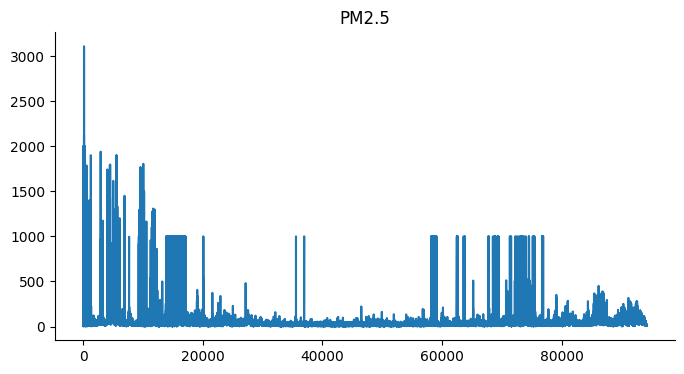

In [4]:
# @title PM2.5

from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='line', figsize=(8, 4), title='PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

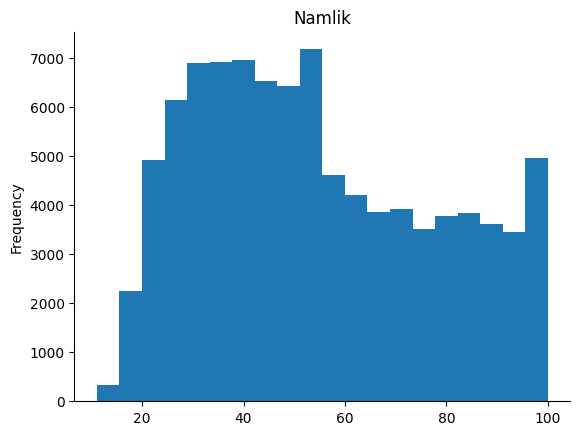

In [5]:
# @title Namlik

from matplotlib import pyplot as plt
df['Namlik'].plot(kind='hist', bins=20, title='Namlik')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df['Sana'].min() , df['Sana'].max()

('1/1/2023', '9/9/2023')

In [7]:
!pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.5 MB/s eta 0:00:00


In [8]:
df['Sana'].duplicated().sum()
df['Stansiya'].duplicated().sum()
df = df.drop_duplicates(subset=['Sana', 'Stansiya'])

In [9]:
df_chart = df.pivot(index='Sana', columns='Stansiya', values='PM2.5')
df_chart = df_chart.fillna(df_chart.mean())
df_chart.head()

Stansiya,"Bektemir tumani, 578-bog'cha",G'afur G'ulom bog'i,Lokomotiv Park,"Olmazor tumani, 423-bog'cha","Omazor tumani, Dermatalogiya",Tuzel-1 557-bog'cha,Xalqlar do'stligi,Yangi O'zbekiston Bog'i,Yangihayot tumani 329-maktab,"Yangihayot tumani, 333-maktab"
Sana,,,,,,,,,,
1/1/2023,64.000000,31.0,85.000000,47.031684,81.000000,89.000000,54.0,100.0,30.738301,37.979419
1/1/2024,39.500000,60.0,1000.000000,25.500000,39.500000,54.000000,27.5,38.0,30.738301,42.000000
1/10/2023,51.000000,30.0,27.000000,47.031684,25.000000,26.000000,13.5,34.0,30.738301,37.979419
1/10/2024,76.000000,74.0,69.000000,47.031684,78.000000,88.000000,49.0,64.0,64.500000,77.000000
1/11/2023,44.857918,9.0,98.110074,47.031684,51.990797,42.545455,16.0,34.0,30.738301,37.979419


In [ ]:
import bar_chart_race as bcr

df_chart_simplified = df_chart.iloc[::2]

bcr_html = bcr.bar_chart_race(df=df_chart_simplified,
                              filename=None,
                              orientation='h',
                              sort='desc',
                              n_bars=10,
                              label_bars=True,
                              use_index=True,
                              steps_per_period=10,
                              period_length=500,
                              figsize=(4, 3.5),
                              cmap='dark24',
                              title='City-Wise CO Pollution Levels ',
                              bar_label_size=7,
                              tick_label_size=7,
                              period_label_size=16,
                              fig=None)

display(HTML(bcr_html))